<center><h1> Programmering og Modellering Prosjekt - Epidemiologi </h1></center>


<center><h3> Av Espen, Vilde, Ridwan og Martin </h3></center>


#### Vi starter med å importere de bibliotekene vi kommer til å trenge utover oppgaven


In [2]:
#pylab
import pylab as pyl

#math
import math

#numPy
import numpy as np

### Del 1 - Oppgave 8.20 i Prog Mod boka (s. 171)


**a)**


*Endringen i mengden som kan bli smittet ($S(t)$) er mengden med mennesker som blir smittet. Vi skal ha et negativt fortegn fordi alle som blir smittet vil "forlate" $S(t)$ som må gjøre $S'(t)$ et negativt tall. Uttrykket $-b * S(t)$ gir et svar på antall mennesker som blir smittet av ett sykt menneske, og dermed må vi bare multiplisere med antall smittede $(I(t))$ ved samme tid ($t$). Da har vi likningen $S'(t) = -b * S(t) * I(t)$.*



*Endringen i de nylig kurerte ($R'(t)$) vil være prosent andelen $f$ (prosent av de syke som blir friske) mulitplisert med antall smittede $I(t)$. 
Det blir altså, $R'(t) = f * I(t)$.*

**b)**



*Endringen av de syke $I'(t)$ vil være den samme som $S'(t)$, men her med positivt fortegn og det er samme situasjon med $R'(t)$ der $I'(t)$ vil ta den negative verdien av det uttrykket. Dermed blir summen av dem alle lik 0.*

*Vi kan også heller bare si forkortet at siden vi vet at den totale befolkningen $N(t)$ ikke endrer seg så er det naturlig at summen av endringene innenfor beolkningen resulterer i null også.*

*Altså kan vi konkludere at:*

$$S'(t) + I'(t) + R'(t) = 0$$



*Nå kan vi dermed uttrykke $I(t)$ fordi den er basert på to allerede bekjente uttryk vi fant istad.*

*Vi utleder følgende:*



$$I'(t) = - S'(t) - R'(t)$$





$$I'(t) = -(-b * S(t) * I(t)) -(f * I(t))$$



*Og til slutt får vi da uttrykket:*


$$I'(t) = b * S(t) * I(t) - f * I(t)$$

**c)**


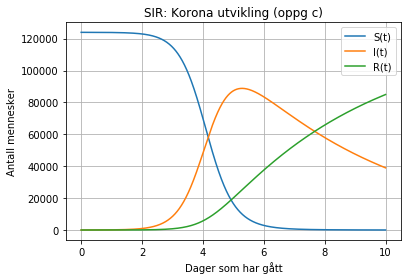

In [30]:
#Modellen
    
#Konstanter
Befolkning = 124000
antall_punkter = 10000
dager = 10
h = dager/(antall_punkter - 1)
b = 2e-5
f = 0.2
    
#Forhåndslagde lister til Eulers Metode
t = pyl.zeros(antall_punkter)

S = pyl.zeros(antall_punkter)
I = pyl.zeros(antall_punkter)
R = pyl.zeros(antall_punkter)
    
#Initialbetingelser for S(t), I(t) og R(t)
S[0] = Befolkning - 10
I[0] = 10
#R[0] er allerede 0 så vi trenger ikke å 'definere' den

    
#Eulers Metode
for j in range(antall_punkter - 1):
    t[j+1] = t[j] + h
    
    S[j+1] = S[j] + (-b*S[j]*I[j]) * h
    I[j+1] = I[j] + (b*S[j]*I[j] - f*I[j]) * h
    R[j+1] = R[j] + (f*I[j]) * h
    
#Plotter modellen
pyl.plot(t, S, label='S(t)')
pyl.plot(t, I, label='I(t)')
pyl.plot(t, R, label='R(t)')
    
#Legger til 'legends', nett og viser modellen
pyl.legend()
pyl.title('SIR: Korona utvikling (oppg c)')
pyl.xlabel('Dager som har gått')
pyl.ylabel('Antall mennesker')
pyl.grid()
pyl.show()

**d)**

In [25]:
#Funksjonen
def SIR_Modell(antall_tidssteg, bVerdi, fVerdi, S0, I0, R0):
    #Konstanter
    dager = 10
    h = dager/(antall_tidssteg - 1)
    
    #Forhåndslagde lister til Eulers Metode
    t = pyl.zeros(antall_tidssteg)
    
    S = pyl.zeros(antall_tidssteg)
    I = pyl.zeros(antall_tidssteg)
    R = pyl.zeros(antall_tidssteg)
    
    #Initialbetingelser for S(t), I(t) og R(t)
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    #Eulers Metode
    for j in range(antall_tidssteg - 1):
        t[j+1] = t[j] + h
        
        b = bVerdi
        if t[j] < 4:
            f = 0.2
        else:
            f = fVerdi
        
        S[j+1] = S[j] + (-b*S[j]*I[j]) * h
        I[j+1] = I[j] + (b*S[j]*I[j] - f*I[j]) * h
        R[j+1] = R[j] + (f*I[j]) * h
        
        
    #Plotter modellen
    pyl.plot(t, S, label='S(t)')
    pyl.plot(t, I, label='I(t)')
    pyl.plot(t, R, label='R(t)')
    
    
    #Legger til 'legends', nett og viser modellen
    pyl.legend()
    pyl.title('SIR: Korona utvikling')
    pyl.xlabel('Dager som har gått')
    pyl.ylabel('Antall mennesker')
    pyl.grid()
    pyl.show()

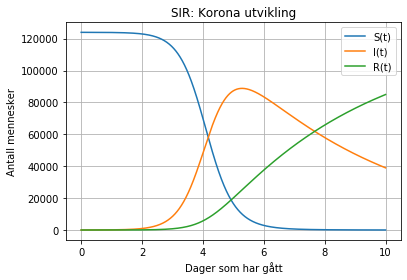

In [27]:
SIR_Modell(10000, 2e-5, 0.2, 123990, 10, 0)

*I oppgaven står det også at vi skal returnere genererte verdier for $t$, $S(t)$, $I(t)$ og $R(t)$. Dette velger vi å gjøre i form av en visuell graf for å lettere kunne forstå dataene og sammenhengene. Sammenligning med oppg. c) blir også lettere.*

*Noe vi også gjorde var å gjøre funksjonen slik at parameteren for $f$ nå er medisinvirkningen som tar effekt etter 4 dager. Vi satte derfor $f$ til å være 20 % til vanlig utenom medisin virkningen. Denne endringen er for at oppgave e) skal bli lettere å fullføre.*


**e)**

*Bruker funksjonen fra oppgave d) til å plotte en modell for e)*

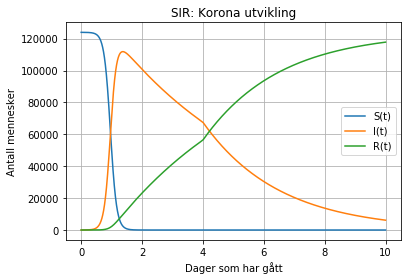

In [28]:
SIR_Modell(10000, (2e-5)*(t[j]+1)*math.e**(-0.01*t[j]**2), 0.4 + 0.5*math.sin(0.6*math.pi*t[j]), 123990, 10, 0)

*Her kan vi nå se hvorfor det lønnet seg å gjøre parameter endringen med $f$ i forrige oppgave, for det gjør da at vi lettere kan tilkalle funksjonen. Men du legger kanskje merke til et problem? Medisinvirkningen vår skulle ta effekt etter 4 dager, og det ser vi at den har gjort ganske tydelig på grunn av endringen i kurvene ved dette tidsrommet. Men her skulle man kanskje tenke at vi heller vil få bølge aktige kurver for f skal nå være et periodisk uttrykk som endrer seg over tiden, i hvertfall for $I(t)$ og $R(t)$, men det gjør de ikke, så hva er problemet?*

*Etter videre testing konkluderer vi med at det ligger i skyld at funksjonen ikke klarer å akseptere en parameter som et endrene funksjonuttrykk. Den beholder parameteren vår for medsinivirkningen som en konstant og det er derfor vi ikke får bølgeaktige kurver. For å løse dette har vi også kodet en modell under som ikke tar bruk av en funksjonen i d) for å plotte, den er kodet fra bunnen av og vi kan da se at både uttrykkene for $b$ og $f$ fungerer som endrene funksjoner basert på verdien av $t$.*

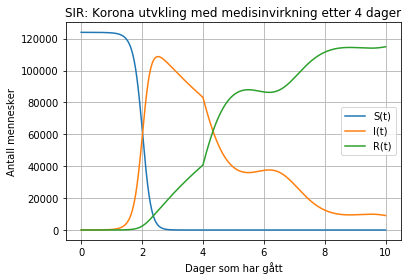

In [26]:
#Modellen
    
#Konstanter
Befolkning = 124000
antall_punkter = 10000
dager = 10
h = dager/(antall_punkter - 1)
    
#Forhåndslagde lister til Eulers Metode
t = pyl.zeros(antall_punkter)

S = pyl.zeros(antall_punkter)
I = pyl.zeros(antall_punkter)
R = pyl.zeros(antall_punkter)
    
#Initialbetingelser for S(t) og I(t)
S[0] = Befolkning - 10
I[0] = 10

    
#Eulers Metode
for j in range(antall_punkter - 1):
    t[j+1] = t[j] + h
    
    b = (2e-5)*(t[j] + 1)*(math.e)**(-0.01*(t[j])**2)
    
    if t[j] < 4:
        f = 0.2
    elif t[j] >= 4:
        f = 0.4 + 0.5*math.sin(0.6*math.pi*t[j])
    
    S[j+1] = S[j] + (-b*S[j]*I[j]) * h
    I[j+1] = I[j] + (b*S[j]*I[j] - f*I[j]) * h
    R[j+1] = R[j] + (f*I[j]) * h
    
 
 #Plotter modellen
pyl.plot(t, S, label='S(t)')
pyl.plot(t, I, label='I(t)')
pyl.plot(t, R, label='R(t)')
    
#Legger til 'legends', nett og viser modellen
pyl.legend()
pyl.title('SIR: Korona utvkling med medisinvirkning etter 4 dager')
pyl.xlabel('Dager som har gått')
pyl.ylabel('Antall mennesker')
pyl.grid()
pyl.show()

*Denne modellen er veldig interessant, den skiller seg også ut fra plottet i c) ved at $I(t)$ vokser raskere og høyere, men kollapser også på en spennende måte i det medisinen tar effekt som vi kan se på de sinus-aktige bølgene etter dag 4.*

*Dette er også altså da hvordan moellen skal se ut.*

### Del 2 - Online Dataanalyse

*I denne delen har vi funnet data over Korona utviklingen i Norge første måned etter 1. pasient. Dataene ble funnet på Kaggle.com som en .csv fil. Derifra kopierte vi dataene over til en .txt fil fordi dataen ikke var store og det er lettere for oss å lese .txt filer gjennom python istedenfor å lære oss å lese dem ved panda biblioteket, fordi vi slet med det.*

*.txt filen som vi bruker er lastet opp til Jupyter allerede. For referanse så viser vi innholdet i filen her.*

In [18]:
fil = open('Norway_Corona.txt', 'r')

print(fil.read())

days since start,Infected,deaths
0,0,0
1,1,0
2,4,0
3,6,0
4,15,0
5,19,0
6,24,0
7,32,0
8,63,0
9,93,0
10,129,0
11,156,0
12,173,0
13,227,0
14,402,0
15,629,0
16,800,1
17,994,1
18,1111,3
19,1256,3
20,1358,3
21,1485,3
22,1591,6
23,1788,7
24,1991,7
25,2194,7
26,2401,7
27,2639,10
28,2906,12
29,3146,14



*DagerSidenPE -> Dager siden 1. Pasient*

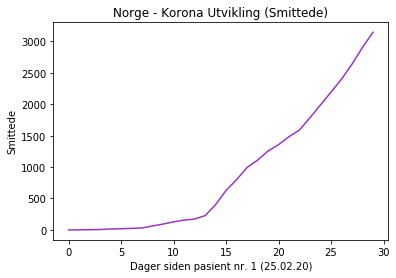

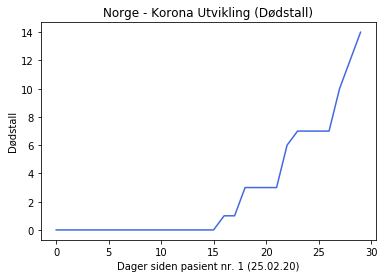

In [3]:
fil = np.loadtxt('Norway_Corona.txt', dtype=int, skiprows=1, delimiter=',')


DagerSidenPE = list(fil[:, 0])
Smittede = list(fil[:, 1])  
Dødstall = list(fil[:, 2])

pyl.plot(DagerSidenPE, Smittede, color='darkorchid')
pyl.title('Norge - Korona Utvikling (Smittede)')
pyl.xlabel('Dager siden pasient nr. 1 (25.02.20)')
pyl.ylabel('Smittede')
pyl.show()

pyl.plot(DagerSidenPE, Dødstall, color='royalblue')
pyl.title('Norge - Korona Utvikling (Dødstall)')
pyl.xlabel('Dager siden pasient nr. 1 (25.02.20)')
pyl.ylabel('Dødstall')
pyl.show()

*Vi ser her at tallet på de smittede er blant annet mye høyere enn dødstallene. Den er også en mye bedre visuell kurve, der kurven for dødstallene blir mer hakkede fordi dødstallene er spåass lave denne 1. måneden av Korona utviklingen her i Norge.*

### Del 3 - Polyfit analyse

*Med Polyfit kan du finne modeller ved regresjonsanalyse. Du setter inn en liste med x-verdier, en med y-verdier for funksjon du vil gjøre regresjonsanalyse på og til slutt setter du in et tall på hvilken grads polynom du vil finne ett polynom for. Outputen får dette er koeffisienter til en polynomsmodell (i riktig rekkefølge) i den graden du bestmemte polynomet til å være. Dette kan vi da plotte og se på punktene og polynomet ved siden av hverandre for sammenligning.*

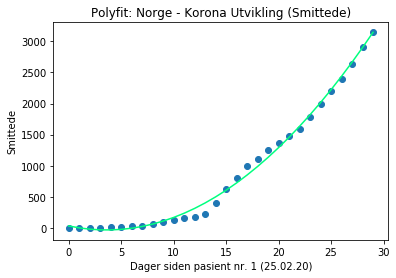

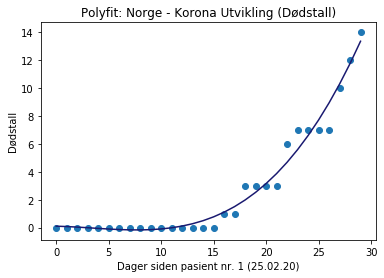

In [20]:
#Polyfit
p1 = np.polyfit(DagerSidenPE, Smittede, 2)
p2 = np.polyfit(DagerSidenPE, Dødstall, 3)

#Modellene
y1 = np.polyval(p1, DagerSidenPE)
y2 = np.polyval(p2, DagerSidenPE)


#Plotter polynom modellene og de andre verdiene fra del 2 som prikker for sammenligning
pyl.plot(DagerSidenPE, Smittede, 'o')
pyl.plot(DagerSidenPE, y1, color='springgreen')
pyl.title('Polyfit: Norge - Korona Utvikling (Smittede)')
pyl.xlabel('Dager siden pasient nr. 1 (25.02.20)')
pyl.ylabel('Smittede')
pyl.show()

pyl.plot(DagerSidenPE, Dødstall, 'o')
pyl.plot(DagerSidenPE, y2, color='midnightblue')
pyl.title('Polyfit: Norge - Korona Utvikling (Dødstall)')
pyl.xlabel('Dager siden pasient nr. 1 (25.02.20)')
pyl.ylabel('Dødstall')
pyl.show()

*Vi valgte 2. grads og 3. grads polynom modeller fordi det var de to modellene som egnet seg best (I løpet av den 1. måneden). Vi testet flere og landet på disse.*

### Del 4 - Norge ved 2.2 millioner smittede


In [36]:
#Finner koeffisientene til polynoms modellen
print(p1)

[  4.9329364  -35.71166276  32.21008065]


In [39]:
#Funksjon for modellen
def NorgeSmittede(t):
    return 4.9329364*t**2 - 35.71166276*t + 32.21008065

i = 0
while NorgeSmittede(i) < 2.2e+6:
    i += 1

print('Norge får 2.2 millioner smittede ved dag nr.', i, 'ifølge modellen.')

Norge får 2.2 millioner smittede ved dag nr. 672 ifølge modellen.


*Vi tenker også at det interressant å finne ut når Norge eventuelt ville passert 1 000 000 døde ifølge modellen. Så vi velger også å utforske dette.*

In [38]:
#Finner koeffisientene til polynoms moedllen
print(p2)

[ 0.00087187 -0.00890597 -0.01795438  0.1007087 ]


In [7]:
#Funksjon for modellen
def NorgeDødstall(t):
    return 0.00087187*t**3 - 0.00890597*t**2 - 0.01795438*t + 0.1007087

i = 0
while NorgeDødstall(i) < 10**6:
    i += 1

print('Norge oppnår ett dødstall på 1 000 000 ved dag nr.', i, 'ifølge modellen')

Norge oppnår ett dødstall på 1 000 000 ved dag nr. 1051 ifølge modellen


*Nå er det vel også å oppriktig å argumentere for at modellen så klart ikke er riktig for dagens situasjon. Den har bare data fra første måned, og det er naturlig at modellen ikke vil stemme med situasjonen nå siden det har roet seg ned i det siste. Denne pandemien hadde aldri drept eller smittet 1 million eller 2.2 millioner men det er fortsatt interessant å kunne forutsi en situasjon med en modell på denne måten.*

*Det er også bar at vi får påpekt dette fordi det viser at en modell blir mer og mer eksakt jo mer data vi har. Jo mindre dataer vi går utifra, jo lenger unna kan forutsetninger være fra sannheten.*

### Del 5 og 6 - Koronasituasjonen i Norge med SIR-modellen

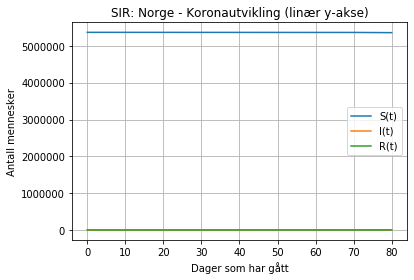

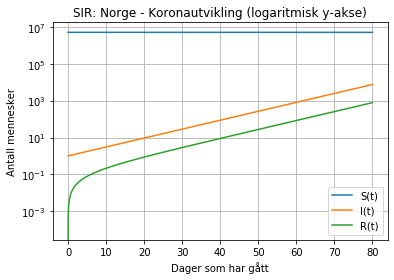

In [22]:
#Modellen
    
#Konstanter
Befolkning = 5.368e+6 #Norges befolkning
antall_punkter = 10000 #Mindre antall punkter av en grunn som kan sees etterpå
dager = 80 #Antall dager siden første smitte 25. Februar
h = dager/(antall_punkter - 1)
b = 2.3e-8 #Den b-en som vil forårsake en riktig økende mnge smitte fram til i dag.
f = 0.92/80 #90 % i Norge av de syke er friskmeldte, så vi tar den prosentandelen over de 80 dagene
    
#Forhåndslagde lister til Eulers Metode
t = pyl.zeros(antall_punkter)

S = pyl.zeros(antall_punkter)
I = pyl.zeros(antall_punkter)
R = pyl.zeros(antall_punkter)
    
#Initialbetingelser for S(t), I(t) og R(t)
S[0] = Befolkning - 1
I[0] = 1
#R[0] er allerede 0 som den skal være så jeg slipper å definere den

    
#Eulers Metode
for j in range(antall_punkter - 1):
    t[j+1] = t[j] + h
    
    S[j+1] = S[j] + (-b*S[j]*I[j]) * h
    I[j+1] = I[j] + (b*S[j]*I[j] - f*I[j]) * h
    R[j+1] = R[j] + (f*I[j]) * h
    

#Plotter modellen linært
pyl.plot(t, S, label='S(t)')
pyl.plot(t, I, label='I(t)')
pyl.plot(t, R, label='R(t)')
    
#Legger til 'legends', nett og viser modellen
pyl.legend()
pyl.title('SIR: Norge - Koronautvikling (linær y-akse)')
pyl.xlabel('Dager som har gått')
pyl.ylabel('Antall mennesker')
pyl.grid()
pyl.show()

#Plotter modellen logaritmisk
pyl.plot(t, S, label='S(t)')
pyl.plot(t, I, label='I(t)')
pyl.plot(t, R, label='R(t)')
    
#Legger til 'legends', nett og viser modellen
pyl.legend()
pyl.title('SIR: Norge - Koronautvikling (logaritmisk y-akse)')
pyl.xlabel('Dager som har gått')
pyl.ylabel('Antall mennesker')
pyl.grid()
pyl.yscale('log') #Logaritmisk y-akse for å kunne sammenligne lave smitte-verdier på litt over 8000 med 5.4 millioner innbyggere
pyl.show()


*Her har vi tilpasset SIR-modellen vår fra første oppgave til Norges befolkning. Endringer på koden er for eksempel endring i befoklningsmengden, $b$ og $f$- verdier og initial betingelser. Legg også merke til at vi har plottet også en logaritmisk for y aksen for å kunne lettere se endringen i $I(t)$ og $R(t)$ lettere. I dette tilfelle kan man tydelig se at en logaritmisk modell er mye bedre for å faktisk visualisere ednringene.*

*Både befolkningen, og initial betingelsene våre er relativt rett fram og finne, men uttrykkene for $b$ og $f$ er mer tricky. For f valgte vi bare trekke fram en prosentandel fra FHI som sier at 90 % av de syke er friskmeldte. Denne prosent andelen har vi delt på antall dager slik at vi har en gjennomsnittleig prosentandel hver dag som kan gjøre kurven til $R(t)$ en smule unøyakitig, men det går bra tenker vi.*

*Akkurat størrelsen for b var kanskje den vanskeligste å håndtere, og vi har prøvd flere metoder. Siden den var vanskelig å forstå hvordan vi skulle finne den så har vi test plottet for mange verdier og landet på en der smitte kurve stopper på riktig verdi. Det er ikke det mest fornuftige, men det fungerer for hensikten vår av å modellere Norges Korona situasjon.*

In [26]:
h = 1 #Vi sjekker punkter fro hver 80 dag, hver nye t-verdi skal da være hele tall

for j in range(81):
    t[j+1] = t[j] + h
    
    S[j+1] = S[j] + (-b*S[j]*I[j]) * h
    I[j+1] = I[j] + (b*S[j]*I[j] - f*I[j]) * h
    R[j+1] = R[j] + (f*I[j]) * h
    
    print((j, b*S[j]*I[j])) #printer ut mengden som smittes hver dag med markert dag ved siden av.

(0, 0.123463977)
(1, 0.13728749172354415)
(2, 0.1526587409951418)
(3, 0.16975101501773987)
(4, 0.18875700617582566)
(5, 0.20989098136166395)
(6, 0.23339119751922519)
(7, 0.25952258763633046)
(8, 0.28857974746411946)
(9, 0.3208902566327946)
(10, 0.3568183716019088)
(11, 0.3967691320747114)
(12, 0.4411929271664641)
(13, 0.49059057279869517)
(14, 0.5455189575534339)
(15, 0.6065973206284752)
(16, 0.6745142326588088)
(17, 0.7500353580907381)
(18, 0.8340120866031032)
(19, 0.9273911308635613)
(20, 1.0312251987973051)
(21, 1.1466848606534707)
(22, 1.2750717446170294)
(23, 1.4178332096826174)
(24, 1.5765786611498906)
(25, 1.7530976926047237)
(26, 1.949380258824884)
(27, 2.1676391069239274)
(28, 2.4103347184798682)
(29, 2.6802030436712876)
(30, 2.980286339880221)
(31, 3.3139674621711106)
(32, 3.685007991910033)
(33, 4.097590632983709)
(34, 4.556366353097019)
(35, 5.066506801008033)
(36, 5.633762589897645)
(37, 6.264528103029233)
(38, 6.965913551168101)
(39, 7.745825092717655)
(40, 8.613053918095

*Her fikk vi også lyst til å vise for forståelsens grunn ca. hvor mange flere som blir smittet per dag, som du kan se er det økende tall hele veien som ikke helt stemmer med en realistisk smittemodell som allerede har hatt sitt toppunkt og er på vei ned, men likevel kan du se at verdiene som vi kan se på etterhvert ligner til en grad på smittetall som vi hadde for kort tid siden, så det er noen lyspunkter også, ved at den bruker mange rikitge verdier selv om de kan være til feil tider.*


***Final thoughts or somthin***

*SIR-modellen som vi nå har jobbet lenge med kan vi konkludere med at ikke er en dårlig modell. Med riktig informasjon og opplysninger får vi nogenlunde gode resultater, men den har en ulempe ved at den er rett og slett for enkel. Det er ikke nok variabler her til å gi en fullt og helhetlig modell av et samfunn sin utvikling.*

*Det aller beste vi kan gjøre for å danne oss en best mulig modell er å observere data i lang tid. Jo lenger vi observerer jo mer oppriktig blir den, men det er likevel alltid vi aldri kan forutsette og endringer som kan gjøre store forskjeller fra tid til annen. Uansett hvor lenge vi eventuelt vi observere en hendelse, er det umulig og kunne forutse hva som skjer neste dag fullt og helhetlig. Så det å lage en perfekt modell er nærmest umlig. Bare fordi at et smitte tall øker med 253 mennesker for hver dag, så er det ingen garanti for at neste dag vil følge mønstre for det er så utrolig mange faktorer som spiller inn i alt. Dette er grunnen til at SIR-modellen ikke er en dårlig modell, fordi en perfekt moell som kan se forutsi alt er nærmest umulig.*